tensor([[1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.]])


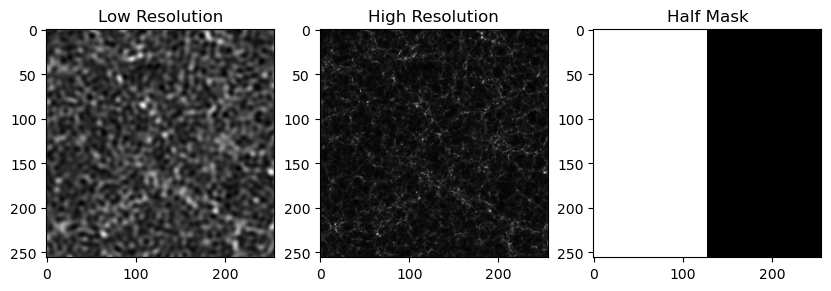

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import torch
from torchvision import transforms

tfs = transforms.Compose([
	transforms.Resize((256, 256)),
	transforms.ToTensor(),
	transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
	transforms.Grayscale(num_output_channels=1),
])

tfs_mask = transforms.Compose([
	# transforms.Resize((256, 256)),
	transforms.ToTensor(),
	# transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
	# transforms.Grayscale(num_output_channels=1),
])

lr_image = '../matter-density-superresolution/test/lr/1-0.png'
hr_image = '../matter-density-superresolution/test/hr/1-0.png'
half_mask = 'half.png'

def pil_loader(path):
    return Image.open(path).convert('RGB')

# Load images using numpy
lr = tfs(pil_loader(lr_image))[0]
hr = tfs(pil_loader(hr_image))[0]
half_mask = tfs_mask(pil_loader(half_mask))[0]

# Plot images
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(lr, cmap='gray')
plt.title('Low Resolution')
plt.subplot(1, 3, 2)
plt.imshow(hr, cmap='gray')
plt.title('High Resolution')
plt.subplot(1, 3, 3)
plt.imshow(half_mask, cmap='gray')
plt.title('Half Mask')

print(half_mask)

plt.show()

In [16]:
%run run_inpaint.py --lr-img-path ../matter-density-superresolution/test/lr/1-0.png --hr-img-path ../matter-density-superresolution/test/hr/1-0.png --mask-path half.png --num-inference-steps 100 --jump-length 10 --jump-n-sample 10 -c config/superresolution.json

export CUDA_VISIBLE_DEVICES=0


D:\Documents\GitHub\Palette-Image-to-Image-Diffusion-Models\run_inpaint.py:107: UserWarning: You have chosen to use cudnn for accleration. torch.backends.cudnn.enabled=True
  warnings.warn('You have chosen to use cudnn for accleration. torch.backends.cudnn.enabled=True')


Assuming image size is [256, 256]


sampling loop time steps: 100%|██████████| 1720/1720 [00:42<00:00, 40.19it/s]


In [59]:
# half_mask = np.array(half_mask)[:,:,0] // np.max(np.array(half_mask))


tensor([[-0.7097, -0.8274, -0.8352,  ..., -0.8509, -0.5686, -0.7725],
        [-0.8352, -0.8901, -0.8744,  ..., -0.9450, -0.7568, -0.6313],
        [-0.8666, -0.8901, -0.9136,  ..., -0.8274, -0.8509, -0.6940],
        ...,
        [-0.7333, -0.7568, -0.7882,  ..., -0.7568, -0.8274, -0.8195],
        [-0.7489, -0.7568, -0.8038,  ..., -0.7803, -0.7411, -0.8195],
        [-0.7882, -0.8117, -0.7646,  ..., -0.9842, -0.7176, -0.5607]])


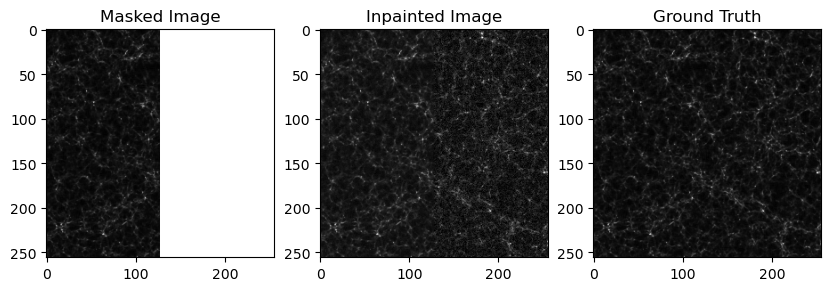

In [60]:
# inpaint_img = x_t.squeeze().detach().cpu().numpy()
inpaint_img = tfs(pil_loader('output/repaint.png'))[0]

print(inpaint_img)



plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(hr*half_mask, cmap='gray')
plt.title('Masked Image')

plt.subplot(1, 3, 2)
plt.imshow(inpaint_img, cmap='gray')
plt.title('Inpainted Image')

plt.subplot(1, 3, 3)
plt.imshow(hr, cmap='gray')
plt.title('Ground Truth')
plt.show()

In [62]:
hr*half_mask

tensor([[-0.8666, -0.9215, -0.9215,  ..., -0.0000, -0.0000, -0.0000],
        [-0.9215, -0.9450, -0.9528,  ..., -0.0000, -0.0000, -0.0000],
        [-0.9450, -0.9528, -0.9607,  ..., -0.0000, -0.0000, -0.0000],
        ...,
        [-0.8666, -0.8744, -0.8979,  ..., -0.0000, -0.0000, -0.0000],
        [-0.8666, -0.8823, -0.9136,  ..., -0.0000, -0.0000, -0.0000],
        [-0.8979, -0.8979, -0.8744,  ..., -0.0000, -0.0000, -0.0000]])

In [63]:
hr

tensor([[-0.8666, -0.9215, -0.9215,  ..., -0.9372, -0.8979, -0.8901],
        [-0.9215, -0.9450, -0.9528,  ..., -0.9528, -0.9136, -0.8901],
        [-0.9450, -0.9528, -0.9607,  ..., -0.9528, -0.9215, -0.8979],
        ...,
        [-0.8666, -0.8744, -0.8979,  ..., -0.9215, -0.9293, -0.9372],
        [-0.8666, -0.8823, -0.9136,  ..., -0.9293, -0.9058, -0.8901],
        [-0.8979, -0.8979, -0.8744,  ..., -0.9372, -0.9136, -0.9136]])